In [1]:
import numpy as np
import os
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D

Load train & test files

In [2]:
files_train = 0
files_validation = 0
cwd = os.getcwd()
folder = 'train_data/train'

for sub_folder in os.listdir(folder):
    path, dirs, files = next(os.walk(os.path.join(folder, sub_folder)))
    files_train +=len(files)
    
folder = 'train_data/test'

for sub_folder in os.listdir(folder):
    path, dirs, files = next(os.walk(os.path.join(folder, sub_folder)))
    files_validation +=len(files)

print(files_train, files_validation)

432 164


Set key parameters

In [3]:
img_width, img_height = 48,48
train_data_dir = 'train_data/train'
validation_data_dir = 'train_data/test'
nb_train_sample = files_train
nb_validation_sample = files_validation
batch_size = 32
epochs = 15
num_classes = 2

Build model on top of a pretrained VGG

In [4]:
model = applications.VGG16(weights = 'imagenet', include_top = False, input_shape = (img_width, img_height, 3))

In [5]:
model.layers

In [6]:
for layer in model.layers[:10]:
    layer.traiable = False

In [7]:
x = model.output
x = Flatten()(x)

predictions = Dense(num_classes, activation = 'softmax')(x)
model_final = Model(inputs = model.input, outputs = predictions)

model_final.compile(loss = 'categorical_crossentropy', 
                    optimizer = optimizers.SGD(lr = 0.0001, momentum=0.9), 
                    metrics=['accuracy'])

c:\Users\HIMADRI MONDAL\anaconda3\envs\abc\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Data Augumentation

In [8]:
train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, 
                   fill_mode='nearest',zoom_range=0.1, width_shift_range=0.1, 
                  height_shift_range=0.1, rotation_range=5)

test_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, 
                   fill_mode='nearest',zoom_range=0.1, width_shift_range=0.1, 
                  height_shift_range=0.1, rotation_range=5)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_height, img_width), 
                                 batch_size = batch_size, class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(validation_data_dir, target_size=(img_height, img_width), 
                                 batch_size = batch_size, class_mode = 'categorical')

Found 432 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


In [9]:
history = model_final.fit_generator(
train_generator, steps_per_epoch=nb_train_sample//batch_size, 
    validation_steps=nb_validation_sample//batch_size, 
epochs = epochs, validation_data=validation_generator)

C:\Users\HIMADRI MONDAL\AppData\Local\Temp\ipykernel_23600\31626457.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_final.fit_generator(


Epoch 1/15
13/13 [==============================] - 32s 2s/step - loss: 0.7207 - accuracy: 0.5650 - val_loss: 0.4510 - val_accuracy: 0.7688
Epoch 2/15
13/13 [==============================] - 33s 3s/step - loss: 0.3435 - accuracy: 0.8250 - val_loss: 0.3094 - val_accuracy: 0.8938
Epoch 3/15
13/13 [==============================] - 31s 2s/step - loss: 0.2531 - accuracy: 0.9200 - val_loss: 0.2604 - val_accuracy: 0.8813
Epoch 4/15
13/13 [==============================] - 31s 2s/step - loss: 0.1780 - accuracy: 0.9550 - val_loss: 0.2032 - val_accuracy: 0.9187
Epoch 5/15
13/13 [==============================] - 32s 3s/step - loss: 0.1304 - accuracy: 0.9675 - val_loss: 0.1716 - val_accuracy: 0.9187
Epoch 6/15
13/13 [==============================] - 31s 2s/step - loss: 0.1163 - accuracy: 0.9675 - val_loss: 0.1723 - val_accuracy: 0.9187
Epoch 7/15
13/13 [==============================] - 31s 2s/step - loss: 0.1088 - accuracy: 0.9700 - val_loss: 0.1609 - val_accuracy: 0.9187
Epoch 8/15
13/13 [==

In [10]:
history.history

{'loss': [0.7206873297691345,
  0.343529611825943,
  0.2530573606491089,
  0.17799465358257294,
  0.1304069608449936,
  0.11633408814668655,
  0.10878681391477585,
  0.07460366934537888,
  0.058490458875894547,
  0.07461898028850555,
  0.06885114312171936,
  0.055962882936000824,
  0.040285948663949966,
  0.03638800233602524,
  0.03431840240955353],
 'accuracy': [0.5649999976158142,
  0.824999988079071,
  0.9200000166893005,
  0.9549999833106995,
  0.9674999713897705,
  0.9674999713897705,
  0.9700000286102295,
  0.9750000238418579,
  0.9775000214576721,
  0.9750000238418579,
  0.9725000262260437,
  0.9825000166893005,
  0.9950000047683716,
  0.987500011920929,
  0.9900000095367432],
 'val_loss': [0.4509522318840027,
  0.30942684412002563,
  0.2603795528411865,
  0.20315539836883545,
  0.17163050174713135,
  0.17226791381835938,
  0.16088977456092834,
  0.1852242797613144,
  0.1544286012649536,
  0.14283151924610138,
  0.16965165734291077,
  0.16203434765338898,
  0.11755947023630142,


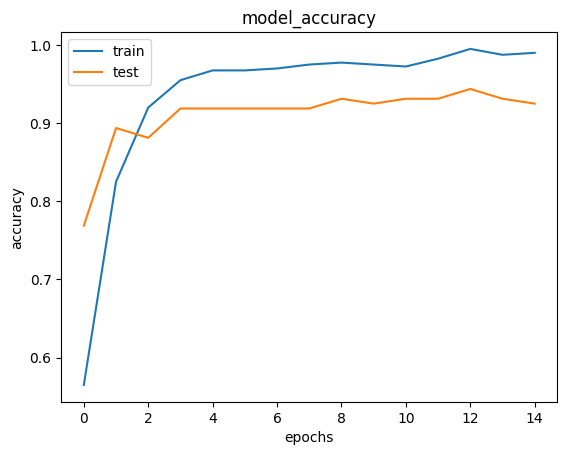

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

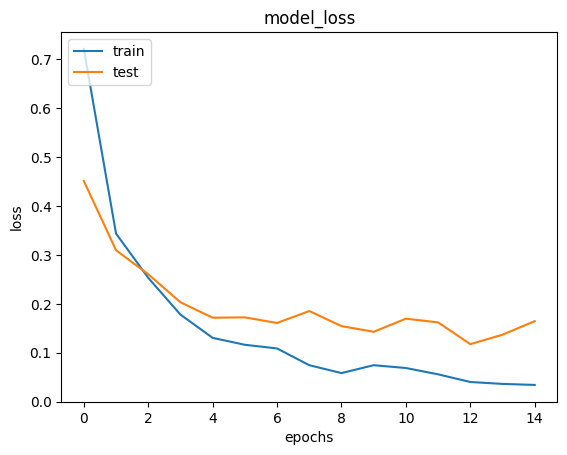

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [13]:
model_final.save('model_final.h5')

In [14]:
class_dictionary = {}
class_dictionary[0]  = 'no_car'
class_dictionary[1]  = 'car'

In [15]:
class_dictionary

{0: 'no_car', 1: 'car'}

Predictive System

In [16]:
import cv2
import numpy as np

def make_prediction(image):
    image = cv2.imread(image)
    image = cv2.resize(image, (48, 48))
    img = image/255
#     (1, 48, 48, 3) -> 4D Tensor
    img = np.expand_dims(img, axis = 0)
    
    class_predicted = model_final.predict(img)
    intId = np.argmax(class_predicted[0])
    label = class_dictionary[intId]
    return label

In [17]:
make_prediction("roi_1.png")

1/1 [==============================] - 0s 185ms/step


'car'

In [18]:
make_prediction("spot169.jpg")

1/1 [==============================] - 0s 32ms/step


'no_car'

In [19]:
model_final.save("model_final.h5")